<a href="https://colab.research.google.com/github/Cann-Emma/DS1002-zgb8ts/blob/main/TextMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
install.packages("SnowballC")
install.packages("tm")
install.packages("plotly")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘BH’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘igraph’


Warning message in install.packages("qgraph"):
“installation of package ‘igraph’ had non-zero exit status”
Warning message in install.packages("qgraph"):
“installation of package ‘qgraph’ had non-zero exit status”


In [8]:
library(ggplot2)
library(dplyr)
library(SnowballC)
library(tm)
library(plotly)

In [9]:
lyrics<- read.csv("lyrics_beatles.csv", header= T, stringsAsFactors = F)

In [12]:
corpus<- Corpus(VectorSource((lyrics[, 3])))
corpus<- tm_map(corpus, tolower)
corpus<- tm_map(corpus, removePunctuation)
corpus<- tm_map(corpus, removeNumbers)
corpus<- tm_map(corpus, removeWords, stopwords("english"))
corpus<- tm_map(corpus, stemDocument)

Warning message in tm_map.SimpleCorpus(corpus, tolower):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removeWords, stopwords("english")):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, stemDocument):
“transformation drops documents”


In [14]:
dtm<- DocumentTermMatrix(corpus)
dtm

<<DocumentTermMatrix (documents: 187, terms: 1719)>>
Non-/sparse entries: 7000/314453
Sparsity           : 98%
Maximal term length: 17
Weighting          : term frequency (tf)

In [22]:
dtm.beatles<- removeSparseTerms(dtm, sparse= 0.90)
dtm.beatles

<<DocumentTermMatrix (documents: 187, terms: 72)>>
Non-/sparse entries: 2515/10949
Sparsity           : 81%
Maximal term length: 7
Weighting          : term frequency (tf)

In [29]:
removeSparseTerms(dtm, sparse= 0.99)
removeSparseTerms(dtm, sparse= 0.98)
removeSparseTerms(dtm, sparse= 0.97)
removeSparseTerms(dtm, sparse= 0.96)

<<DocumentTermMatrix (documents: 187, terms: 776)>>
Non-/sparse entries: 6057/139055
Sparsity           : 96%
Maximal term length: 16
Weighting          : term frequency (tf)

<<DocumentTermMatrix (documents: 187, terms: 412)>>
Non-/sparse entries: 5225/71819
Sparsity           : 93%
Maximal term length: 10
Weighting          : term frequency (tf)

<<DocumentTermMatrix (documents: 187, terms: 274)>>
Non-/sparse entries: 4621/46617
Sparsity           : 91%
Maximal term length: 10
Weighting          : term frequency (tf)

<<DocumentTermMatrix (documents: 187, terms: 219)>>
Non-/sparse entries: 4267/36686
Sparsity           : 90%
Maximal term length: 10
Weighting          : term frequency (tf)

In [ ]:
dtm.df<- as.data.frame(as.matrix(dtm))
dtm.df

In [ ]:
beatles.lyrics<- as.data.frame(as.matrix(dtm.beatles))
beatles.lyrics

In [25]:
lyrics_freq<- sort(colSums(beatles.lyrics), decreasing = T)
lyrics_freq

love    know    dont    yeah    come    need     now     say     see     can 
    589     301     249     226     189     181     170     169     158     157 
    get     ill    girl     got    like    time    your    will    babi    back 
    153     145     145     140     139     136     126     122     122     120 
   want     cri    good    feel    cant     ive     let    make     day     one 
    120     117     115     114     110     109     108     106     106     103 
   tell    long   never     man    well    just    home    look   pleas    take 
    103     101      98      93      92      91      85      80      80      80 
  think    shes     way   night    said    wait   thing    mind    away     yes 
     79      78      73      72      71      70      62      62      60      59 
   word     ooh    leav   right     tri     eye   world   heart   alway    youv 
     57      54      54      53      52      52      46      43      42      42 
   that    sing   there  around  though everyth    find    blue    head    hear 
     41      41      40      39      36      36      36      34      33      31 
   show    turn 
     30      26

In [28]:
lyrics_freq.dat<- data.frame(word= names(lyrics_freq), freq= lyrics_freq)
head(lyrics_freq.dat,3)
tail(lyrics_freq.dat,3)

,word,freq
,<chr>,<dbl>
love,love,589
know,know,301
dont,dont,249


,word,freq
,<chr>,<dbl>
hear,hear,31
show,show,30
turn,turn,26


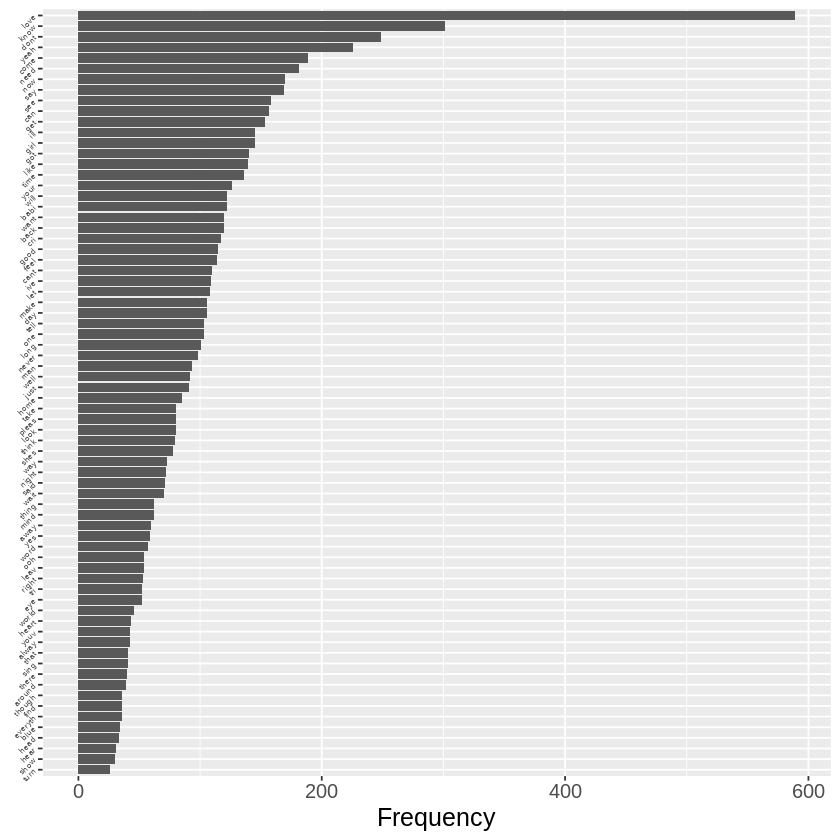

In [32]:
ggplot(lyrics_freq.dat, aes(reorder(word, freq), freq))+ geom_col() + xlab(NULL) + coord_flip() + ylab("Frequency") +
theme(text = element_text(size = 15), axis.text.y = element_text(size = 5, angle = 45))

[Correlation Plot](file:///C:/Users/Emmanuella/Desktop/PSYC%205710/Text_Mining/beatles.cor.html)
